## EECS 491 Assignment 2

Due Wed Feb 26 before midnight. 100 points total.

### Submitting assignments to Canvas

- For jupyter notebooks, submit the .ipynb file and a pdf export of the notebook.
- Make sure you check that the pdf export represents the latest state of your notebook and that the equations and figures are properly rendered.

- If your are not using notebooks, writeup your assignment using latex and submit a pdf with your code.  The writeup should include relevant code with description if it can fit on a page.  

- Use the following format for filenames:
  - `EECS491-A2-yourcaseid.ipynb`
  - `EECS491-A2-yourcaseid.pdf`

- If you have more than these two files, put any additional files in a directory named `EECS491-A2-yourcaseid`. Do not include binaries or large data files. Then zip this directory and submit it with the name `EECS491-A2-yourcaseid.zip`.  Do not use other compression formats.  The `.ipynb` file can be included in the zipped directory, but make sure you submit the `.pdf` file along with the `.zip` file.  This is so it appears at the top level on canvas, which allows for easier grading.

### Q1. Conditional Independence (10 pts)

Consider the following Bayes net.

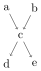

In [7]:
using TikzGraphs, LightGraphs
g = DiGraph(5)
add_edge!(g, 1, 3); add_edge!(g, 2, 3); add_edge!(g, 3, 4); add_edge!(g, 3, 5)
TikzGraphs.plot(g, ["a", "b", "c", "d", "e"], options="font=\\large")

1.1. (5 pts) Show that $a$ is independent of $b$ given no other infomration, i.e.
$$
a \perp b\, |\, \varnothing
$$

1.2. (5 pts) Prove or disprove the following using basic probability (i.e. not using d-separation)
$$
a \perp b\, |\, e
$$

### Q2. Conditional Independence and Causality (5 pts)

Consider the following model

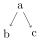

In [8]:
g = DiGraph(3)
add_edge!(g, 1, 2); add_edge!(g, 1, 3)
TikzGraphs.plot(g, ["a", "b", "c"], options="font=\\large")

Show that this causal relationship suggested by the arrows does not necessarily hold, because the identical distribution can be represented by a model defined by different conditional distributions.  What conditional independence assumption does this model make?

### Q3. Model Complexity, Free Parameters, and Simplifying Assumptions (20 pts)

3.1. (5 pts) Consider a *general* joint probability distribution with $N$ variables $x_1 \ldots x_N$ each of which can have $K$ values. What is the expression for the joint distribution in terms of conditional probabilities?

3.2. (5 pts) What is the total number of free-paramters requried to specify this model?  (Note: the term "free parameter" means a parameter that is unconstrained.  For example a Beroulli distribution to describe a coin flip has one free parameter $\theta$ to describe, say, the probability of heads; the probability of tails must be $1-\theta$, because the probability is constrained to sum to one.) Provide both the exact expression and a simpler one in "big-O" notation.

3.3. (5 pts) Now suppose that the complexity of the model is constrained, so that each variable depends on (at most) $m$ other variables and is conditionally independent of the rest, i.e. a Bayes net.  Each node has $m$ parents and there are $m$ root nodes.  How many parameters are required to define this model?

3.4. (5 pts) Let us make one more simplifying assumption, which is that in addition to depending on only $m$ variables, the conditional probability is described by a noisy-OR function (K=2, see Q3).  What is the expression for the number of parameters in this case?

### Q4. Models of Conditional Probability (20 pts)

In Bayesian networks (or directed acyclic graphical models), the joint probability distribution is factored into the product of conditional probability distributions

$$
p(x) = \prod_{i=1}^N p(x_i|\textrm{pa}(x_i))
$$

As we used the previous problem, a simplifying assumption for the conditional probability is noisy-OR model

$$
p(x_i | \textrm{pa}({x_i})) = 1 - (1 - \mu_{i0}) \prod_{\normalsize j \in \textrm{pa}(x_i)}(1 - \mu_{ij})^{x_j}
$$

where $j$ is an index over the parents of $x_i$.  Note that the exponent $x_j$ is either 0 or 1 so the term is either 1 or $1-\mu_{ij}$ depending on the state of the parent $x_j$.

4.1 (5 pts) Show that the noisy-OR function can be interpreted as a "soft" (i.e. probabilistic) form of the logical OR function, i.e. the function gives $x_i = 1$ whenever at least one of the parents is 1.

4.2 (5 pts) What is the interpretation of $\mu_{i0}$? Provide a clear explanation.

Another choice for the conditional probability is a sigmoid function

$$
p(x_i | \textrm{pa}({x_i})) = \sigma
\left(
w_{i0} + \sum_{\normalsize j \in \textrm{pa}(x_i)} w_{ij} x_j
\right)\,, \quad \textrm{where} \;
\sigma(a) = \frac{1}{1+e^{-a}}
$$

where $\sigma (a)$ is the logistic sigmoid function.

4.3 (5 pts) Contrast the noisy-OR function and the sigmoid mathematically.  Is one more general than the other?  Can each compute unique functions?

4.4 (5 pts) Think of two examples, one for the noisy-OR and one for the sigmoid, that contrast the way these functions model the conditional dependencies.  Explain how each is appropriately modeled by one function but not the other.

### Q5. Car Troubles (25 pts)

(Adpted from Barber Exercise 3.6) Your friend has car trouble.  The probability of the car starting is described by the model below, with the probabilities givien in Barber 3.6.

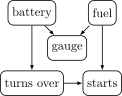

In [10]:
using TikzPictures, LaTeXStrings

# draw the nodes, then make the links
g = TikzPicture(L"""
\tikzstyle{every node} = [draw, minimum size=7mm, rounded corners=2mm]
\tikzset{>=latex}
\foreach \n/\x/\y/\label in {b/1/3/battery, f/3/3/fuel, g/2/2/gauge, t/1/1/turns over, s/3/1/starts}
    \node (\n) at (\x,\y) {\label};
\foreach \from/\to in {b/t, b/g, f/g, f/s, t/s}
    \draw [->] (\from) -- (\to);
""", options="scale=1.25, thick, transform shape")

5.1 (10 pts) Calculate the $p(f=\textsf{empty} | s=\textsf{no})$, the probability of the fuel tank being empty given that the car does not start.  Do this "by hand", i.e in manner similar to the **Inference** section in Barber 3.1.1.  Use the probabilities given in the exercise.  Show your work.

5.2 (5 pts) Implement this network using a toolbox for probabilistic models (e.g. `pgmpy` or `BayesNets.jl`). Use this to verify that your derivation and calculations are correct for the previous problem.

5.3 (10 pts) Suppose you have loaned this car to a friend. They call call you and announce, "the car won't start".  Illustrate your diagnostic and inference process by using the model to show how your beliefs change as you ask questions.  Your friend can only tell you the states of $t$ and $g$ (and you already know $s$).  Use two different scenarios, i.e. two differnt reasons why the car won't start.  For each scenario, your answer should discuss your choice of each question you pose to the network, and how it allows you to uncover the true cause the problem.

### Exploration (20 pts)


Like in the first assignment, in this exercise, you have more lattiude and are meant to do creative exploration.  Like before you don't need to write a book chapter, but the intention is for you to go beyond what's been covered above.

Implement a belief network of your own choosing or design.  It should be more complex that the examples above.  It should be discrete (we will cover continous models later). Use the model to illustrate deductive inference problems.


#### Exploration Grading Rubric

Exploration problems will be graded according the elements in the table below.  The scores in the column headers indicate the number of points possible for each rubric element (given in the rows).  A score of zero for an element is possible if it is missing entirely.

|     | Substandard (+1) | Basic (+2) | Good (+3) | Excellent (+5) |
| :-- | :----------- | :---- | :--- | :-------- |
| <b> Pedagogical Value </b> | No clear statement of idea or concept being explored or explained; lack of motivating questions. | Simple problem with adequate motivation; still could be a useful addition to an assignment. | Good choice of problem with effective illustrations of concept(s).  Demonstrates a deeper level of understanding. | Problem also illustrates or clarifies common conceptual difficulties or misconceptions. |
| <b> Novelty of Ideas </b> | Copies existing problem or makes only a trivial modification; lack of citation(s) for source of inspiration. | Concepts are similar to those covered in the assignment but with some modifications of an existing exericse. | Ideas have clear pedagogical motivation; creates different type of problem or exercise to explore related or foundational concepts more deeply. | Applies a technique or explores concept not covered in the assignment or not discussed at length in lecture. | 
| <b> Clarity of Explanation </b> | Little or confusing explanation; figures lack labels or useful captions; no explanation of motivations. | Explanations are present, but unclear, unfocused, wordy or contain too much technical detail. | Clear and concise explanations of key ideas and motivations. | Also clear and concise, but includes illustrative figures; could be read and understood by students from a variety of backgrounds. |
| <b> Depth of Exploration </b> | Content is obvious or closely imitates assignment problems. | Uses existing problem for different data. | Applies a variation of a technique to solve a problem with an interesting motivation; explores a concept in a series of related problems. | Applies several concepts or techniques; has clear focus of inquiry that is approached from multiple directions.|